# ISYE 6501 HW Week 8
### Question 11.1
***Using the crime data set uscrime.txt from Questions 8.2, 9.1, and 10.1, build a regression model using:***
* Stepwise regression
* Lasso
* Elastic net

I started with basic project set up below by loading the data, setting the directory, and loading the necessary libraries.

In [64]:
# Basic Project set up
rm(list = ls())
setwd('/Users/wwaite/Dev/gtech/ISYE 6501/Week 8')

suppressWarnings(library(ggplot2))
suppressWarnings(library(dplyr))
suppressWarnings(library(repr))
suppressWarnings(library(glmnet))
suppressWarnings(library(caret))
suppressWarnings(library(ggpubr))

# Read the data and get a quick view of the structure
uscrime <- tbl_df(read.table("uscrime.txt", stringsAsFactors = FALSE, header = TRUE))

# Get a view of the data
str(uscrime)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635

### 11.1 Part 1: Stepwise Regression
Approaches to try:
* Backwards Elimination(i.e., backwards stepwise regression)
* Forward Selection (i.e., forward stepwise regression)
* Stepwise Regression (both forward and backward)

In the first part of this homework I am working with Stepwise regression feature selection. Using leave 1 out cross validation, I trained a base model for comparison against the future models I am building using stepwise regression. As you can see from the summary of the model output above, the model used every predictor in the data set, and had a final RSquared value of 0.8031. In the steps below I am going to train 3 individual models each using a different approach to stepwise regression while cross validating all of them simultaneously.

In [66]:
# Set seed for consistent randomness
set.seed(111)

# Store number of rows for use in step
n = nrow(uscrime)

# Create training scheme for use in base model, 
# use leave-1 out cross validation given the small size of the dataset
control = trainControl(method = "LOOCV")

# Train initial linear regression model
model <- train(Crime ~ ., data = uscrime, method="lm", trControl = control)

# Print initial cross validated model with all variables
summary(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855e+

In [81]:
n_tune <- dim(uscrime)[2]
n_tune

[1] 16

In the block directly below, I am using leapBackward to excute stepwise regression with backwards elimination, leapforward to execute step forward, and leapSeq to execute stepwise regression. You are able to identify the best model based on it's Rsquared output, which you can identify using the results output. Additionally, you can find the best model using the built in output of bestTune$nvmax. I did this for all 3 cross validated stepwise models, and then plotted the results below the code block below.

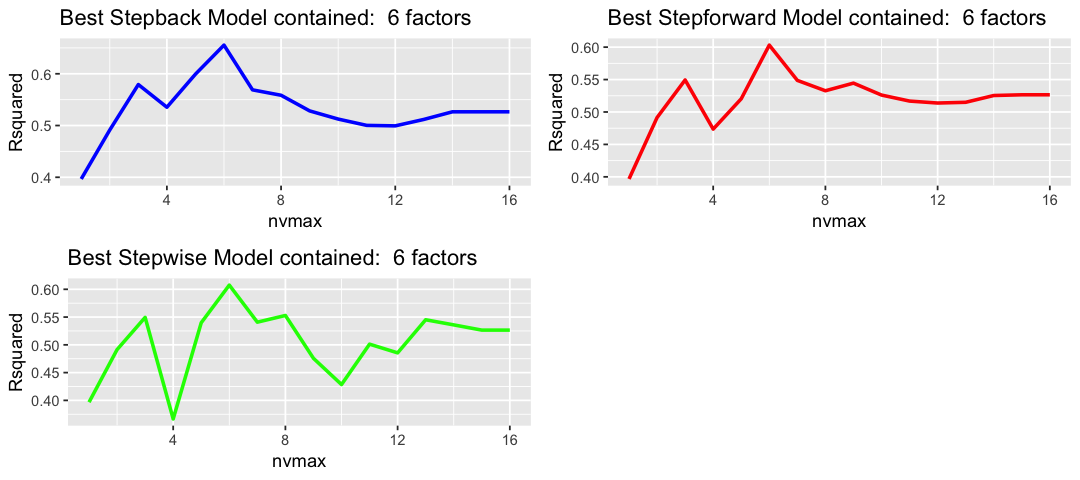

In [76]:


# Train the step back model
step_back <- train(Crime ~ ., data = uscrime,
                    method = "leapBackward",
                    tuneGrid = data.frame(nvmax = 1:n_tune),
                    trControl = control)

# Store the results for each model, and the final result
step_back_results <- as.data.frame(step_back$results)
sb_final_model <- step_back$bestTune$nvmax

# Store step back plot
sb <- ggplot(step_back_results, aes(nvmax, Rsquared)) + 
geom_line(color = 'blue', size = 1) +
labs(title = paste('Best Stepback Model contained: ', sb_final_model, 'factors'))

#-------------------------------------- 
# Train the step forward model
step_forward <- train(Crime ~ ., data = uscrime,
                    method = "leapForward",
                    tuneGrid = data.frame(nvmax = 1:n_tune),
                    trControl = control)

# Store the results for each model, and the final result
step_forward_results <- as.data.frame(step_forward$results)
sf_final_model <- step_forward$bestTune$nvmax

# Store step back plot
sf <- ggplot(step_forward_results, aes(nvmax, Rsquared)) + 
geom_line(color = 'red', size = 1) +
labs(title = paste('Best Stepforward Model contained: ', sf_final_model, 'factors'))

#-------------------------------------- 
# Train the stepwise model
stepwise <- train(Crime ~ ., data = uscrime,
                    method = "leapSeq",
                    tuneGrid = data.frame(nvmax = 1:n_tune),
                    trControl = control)

# Store the results for each model, and the final result
stepwise_results <- as.data.frame(stepwise$results)
sw_final_model <- stepwise$bestTune$nvmax

# Store step back plot
sw <- ggplot(stepwise_results, aes(nvmax, Rsquared)) + 
geom_line(color = 'green', size = 1) +
labs(title = paste('Best Stepwise Model contained: ', sw_final_model, 'factors'))

options(repr.plot.height = 4, repr.plot.width = 9)
ggarrange(sb, sf, sw, ncol = 2, nrow = 2)

In the code above I executed 3 versions of the step wise function using step back, step forward and step wise. I stored the results from each cross validated model in individual data frames, stored the best Tuned model, and then plotted the Rsquared results version the # of factors included in each model. As you can see from the plots above, the optimal number of factors that each cross validated stepwise function found was 6 predictor variables. They all seem to have the same basic shape in the line charts above, with slightly different values of Rsquared. Next I am going to find the highest Rsquared, and then i'll output the final results of that model and explain the results a little bit further. 

In [77]:
#coef(step_back$finalModel, 6)
step_back_results$Rsquared[6]
step_forward_results$Rsquared[6]
stepwise_results$Rsquared[6]

[1] 0.6554087

[1] 0.6031279

[1] 0.6075433

It looks like the first version of the stepwise regression model that I used, Step Back, yielded the highest Rsquared value. Given this result I'll explore the results of that function a little bit further. In the output below, you can see the data that was plotted earlier. The nvmax is the number of variables in the model, for example the nvmax 6 shows the results of the best 6-predictor model. The RMSE and MAE measure the metrics for measuring prediction error, and the lower these values are the better the model. You can see these values follow the same basic trend as the Rsquared. 

In [80]:
stepwise_results

nvmax,RMSE,Rsquared,MAE
1,298.2036,0.3967184,231.3720
2,274.4272,0.4914370,206.0392
3,258.1571,0.5493876,193.4033
4,316.5811,0.3665406,254.0919
5,260.4515,0.5397994,199.2809
6,243.6739,0.6075433,177.3648
7,263.1325,0.5408234,207.4727
8,261.4378,0.5528641,207.1994
9,288.3539,0.4757254,215.9529
10,298.5302,0.4285156,242.3242


Below are the final coefficients of the resulting model Step Back model with an RSquared of about 61%. While the Rsquared of the original cross validated model was higher at about 80%, I used considerably more predictors in building that model. Given that the base model used all of the predictors (16), that model will likely be overfit and harder to explain from a business standpoint. Therefore the Stepback regression model is the best.

In [78]:
coef(stepwise$finalModel, 6)

(Intercept)           M          Ed         Po1          U2        Ineq 
-5040.50498   105.01957   196.47120   115.02419    89.36604    67.65322 
       Prob 
-3801.83628

### 11.1 Part 2: Lasso
In this part of the homework I am going to train a Lasso model using cv.glmnet to cross validate while training. I am using an alpha of 1 in the model which corresponds to lasso. When inspecting the output of the trained model in the first plot below, my goal is to find the lambda that has the smallest corresponding cross validated mean square error. As you can see from the plot below, a lambda of about 14.7 corresponds to the lowest CVM.

In [91]:
set.seed(11)

# Train the lasso model with alpha = 1 for lasso
lasso_model <- cv.glmnet(x = as.matrix(uscrime[,-16]),
                        y = as.matrix(uscrime[,16]),
                         alpha = 1,
                        nfolds = 5,
                        type.measure = "mse",
                        family = "gaussian",
                        standardize = TRUE)



[1] 14.70916

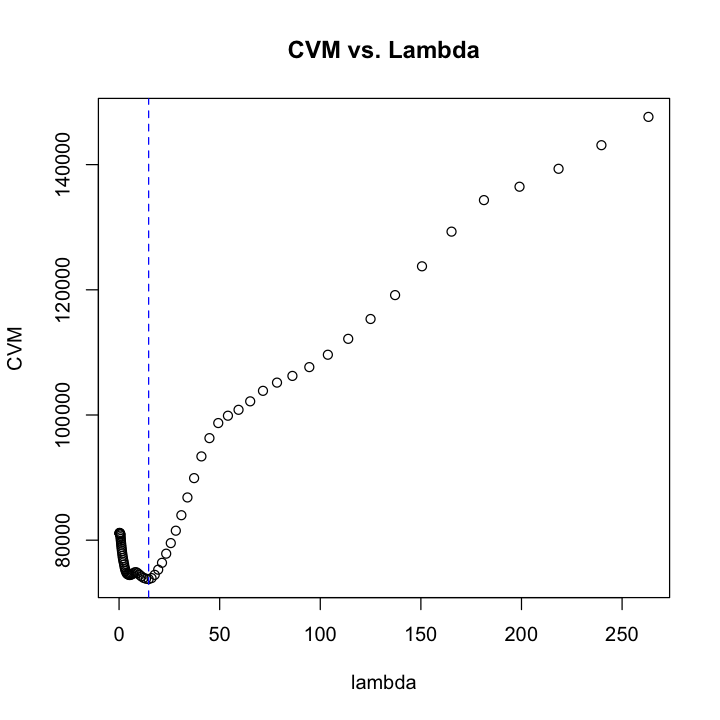

In [99]:
# Plot the lambdas versus the cross validated MSE's to identify the lambda corresponding to the lowest cvm
options(repr.plot.height = 6, repr.plot.width = 6)
plot(lasso_model$lambda, lasso_model$cvm, 
     main = "CVM vs. Lambda", 
     xlab = "lambda", 
     ylab = "CVM")
abline(v = lasso_model$lambda.min, col = "blue", lty = 2)
lasso_model$lambda.min

In the plot below, I am showing the lambda versus the corresponding number of predictor variables that the lasso model found. This is done using the lambda output from the model as well as the nzero. You can see from the plot that the number of predictors that corresponds to the optimal lambda is about 10.

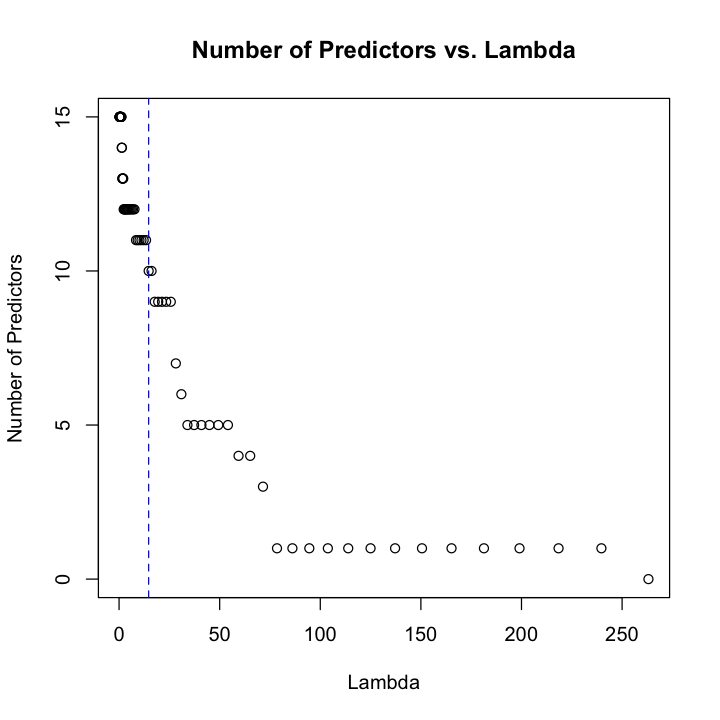

In [101]:
plot(lasso_model$lambda, lasso_model$nzero, 
     main = "Number of Predictors vs. Lambda", 
     xlab = "Lambda", 
     ylab = "Number of Predictors")
abline(v = lasso_model$lambda.min, col = "blue", lty = 2)

After identifying the optimal lambda value, the corresponding cvm, and the number of predictors, I then wanted to evaluate the quality of this model, and all of the other model variants that Lasso found. In the code below, I calculated the Rsquared for each model, and then plotted them. You can see that the lambda we found displays the highest Rsquared value of about 0.5. This is a bit lower than the stepwise regression model I used earlier. Additionally, this method identified the best model using 10 predictor variables which is more complexity than the result from stepwise which was 6. Given this result, I think stepwise found a better model with lower complexity.

Warning message in lasso_model$cvm/var(uscrime[, 16]):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

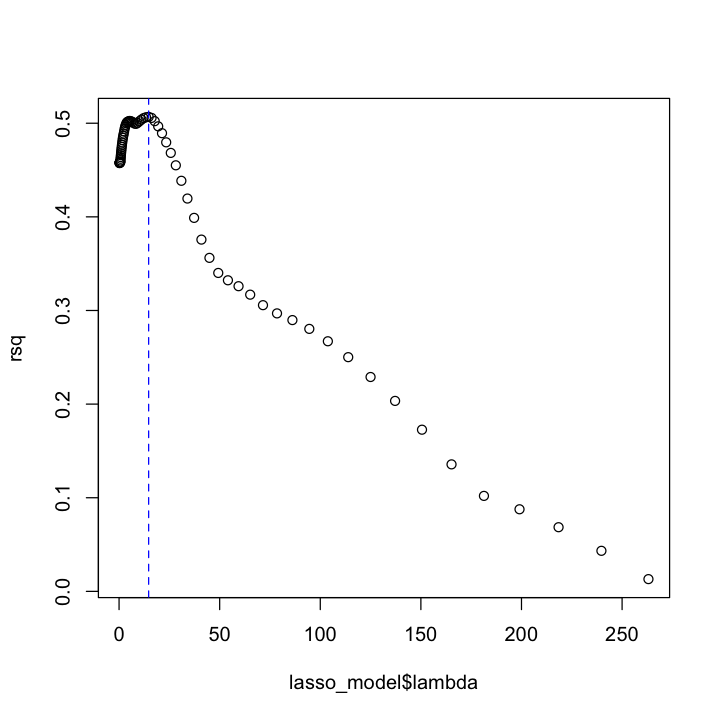

In [122]:
rsq = 1 - lasso_model$cvm/var(uscrime[,16])
plot(lasso_model$lambda,rsq)
abline(v = lasso_model$lambda.min, col = "blue", lty = 2)

In [102]:
# Output the Lasso model coefficients for the predictors
coef(lasso_model, s = lasso_model$lambda.min)

16 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -4149.1634605
M              61.7709218
So             45.3562789
Ed             87.7668344
Po1           104.7130086
Po2             .        
LF             71.4832047
M.F            15.9346818
Pop             .        
NW              0.2580836
U1              .        
U2             34.6955423
Wealth          .        
Ineq           41.1423298
Prob        -3388.8292411
Time            .        

### 11.1 Part 3: Elastic Net
In this final part of the homework, I am again using cv.glmnet to cross validate models while doing feature selection. Much of the code below is identical to what I did in part 2 for lasso, however I changed the alpha argument to 0.5 which instructs the model to use Elastic Net instead of Lasso.

In [123]:
set.seed(11)

# Train the lasso model with alpha = 1 for lasso
en_model <- cv.glmnet(x = as.matrix(uscrime[,-16]),
                        y = as.matrix(uscrime[,16]),
                         alpha = 0.5,
                        nfolds = 5,
                        type.measure = "mse",
                        family = "gaussian",
                        standardize = TRUE)


Similar to the Lasso exercise above, I plotted the Lambda values versus the cross validated mean square errors to identify which value of lambda corresponds to the best model. Based on the plot and output below, the best value of lambda is 8.

[1] 7.997632

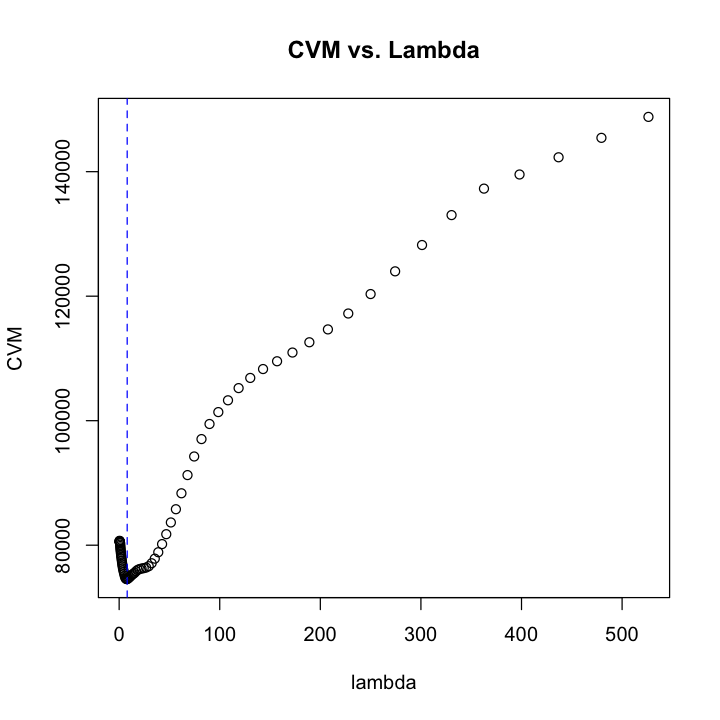

In [124]:
# Plot the lambdas versus the cross validated MSE's to identify the lambda corresponding to the lowest cvm
options(repr.plot.height = 6, repr.plot.width = 6)
plot(en_model$lambda, en_model$cvm, 
     main = "CVM vs. Lambda", 
     xlab = "lambda", 
     ylab = "CVM")
abline(v = en_model$lambda.min, col = "blue", lty = 2)
en_model$lambda.min

I then plotted the number of predictors versus lambda for each model. You can see that as the number of predictors decreases, the lambda increases. It is a little difficult to inspect the plot below because of the grouping of the points, however it looks like the optimal value of lambda (8) has a corresponding number of predictors at about 13 which would indicated a higher complexity.

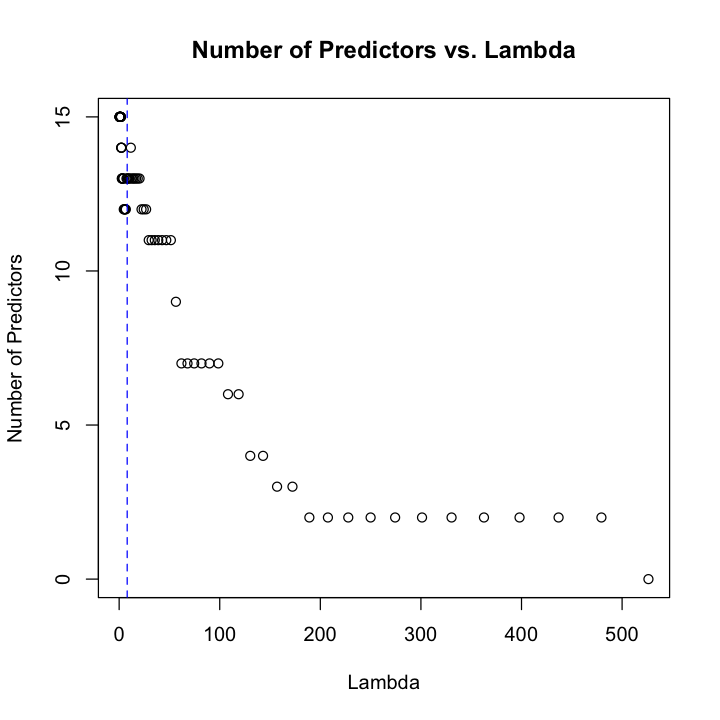

In [125]:
plot(en_model$lambda, en_model$nzero, 
     main = "Number of Predictors vs. Lambda", 
     xlab = "Lambda", 
     ylab = "Number of Predictors")
abline(v = en_model$lambda.min, col = "blue", lty = 2)

Warning message in en_model$cvm/var(uscrime[, 16]):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

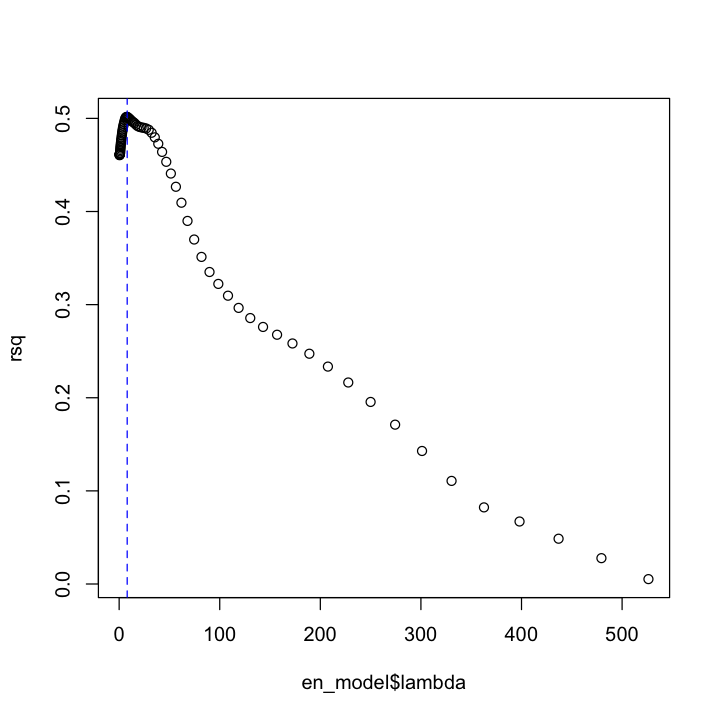

In [127]:
rsq = 1 - en_model$cvm/var(uscrime[,16])
plot(en_model$lambda,rsq)
abline(v = en_model$lambda.min, col = "blue", lty = 2)

Interestingly when plotting the Rsquared values for each model found by the Elastic net, the highest Rsquared is right around the same value of about 0.5. It looks like the number of predictors used in the model with the highest Rsquared in Elastic Net is higher than that found in both the Lasso and Stepwise methods. Based on the similar Rsquared, but larger complexity, this method is less preferrable than Lasso. Stepwise output the highest Rsquared and lowest complexity, while not being as over-fit as the base model so Stepwise regression is the most useful in this scenario.

In [126]:
# Output the Elastic Net model coefficients for the predictors
coef(en_model, s = en_model$lambda.min)

16 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -5.717190e+03
M            7.756331e+01
So           4.177069e+01
Ed           1.425568e+02
Po1          9.209784e+01
Po2          4.319092e+00
LF           .           
M.F          2.022151e+01
Pop         -2.498575e-01
NW           1.777049e+00
U1          -3.632814e+03
U2           1.249811e+02
Wealth       4.607839e-02
Ineq         5.557514e+01
Prob        -3.927317e+03
Time         .           